<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

---

# Clustering

## 🏆 학습 목표 

- Screeplot의 의미를 이해할 수 있다.
- Supervised / Unsupervised learning의 차이를 설명 할 수 있다.
- K-means clustering을 설명 할 수 있다.

---

## Scree Plots

<https://m.blog.naver.com/PostView.nhn?blogId=hsj2864&logNo=220613527515>

<img src='https://i.imgur.com/zyWQBjA.png' width = 400>
<img src='https://i.imgur.com/f60GoIo.png' width = 400>
<br>
<img src='https://www.researchgate.net/profile/Raul_Ramirez-Velarde/publication/275541304/figure/fig1/AS:392017420013568@1470475644164/PCA-Scree-plot-and-cumulative-variance-plots.png' width = 400>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn import decomposition

X1, Y1 = make_blobs(n_features = 10, n_samples = 100, centers = 4, random_state = 4, cluster_std = 2) ## random 하게 simulation data 생성

pca = decomposition.PCA(n_components = 4)
pc = pca.fit_transform(X1)

pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,2
1,18.931381,0.193838,0.045462,-3.894042,1
2,-6.571463,-14.188490,-3.120115,1.278588,0
3,-7.533948,14.439427,-5.443487,3.358252,3
4,-4.591760,-11.315284,-9.130630,-1.420151,0


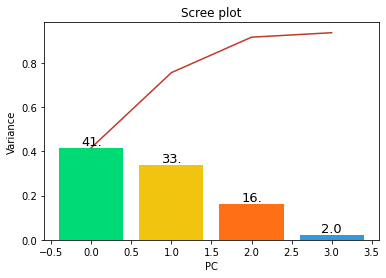

In [2]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca)

# Machine Learning (개요)

<img src='https://i.imgur.com/FCwHoxV.png' width = 450>


- ## 지도 학습 (Supervised Learning): 
Supervised Learning은 트레이닝 데이터에 라벨(답)이 있을때 사용할 수 있습니다. 

  - ### 분류 (Classification)
  분류 알고리즘은 주어진 데이터의 카테고리 혹은 클래스 예측을 위해 사용됩니다.
  - ### 회귀 (Prediction)
  회귀 알고리즘은 continuous 한 데이터를 바탕으로 결과를 예측 하기 위해 사용됩니다.

<img src='https://i.imgur.com/Lwguk7n.png' width = 400>

  

- ## 비지도 학습 (Unsupervised Learning):
  - ### 클러스터링 (Clustering)
  데이터의 연관된 feature를 바탕으로 유사한 그룹을 생성합니다.

  <img src='https://i.imgur.com/RbVlVUy.png' width = 400>

  - ### 차원 축소 (Dimensionality Reduction
  높은 차원을 갖는 데이터셋을 사용하여 feature selection / extraction 등을 통해 차원을 줄이는 방법입니다.
  - ### 연관 규칙 학습 (Association Rule Learning)
  데이터셋의 feature들의 관계를 발견하는 방법입니다 (feature-output 이 아닌 feature-feature)

  <img src='https://i.imgur.com/9TYSGAx.png' width = 400>

- ## 강화 학습 (Reinforcement Learning)
  머신러닝의 한 형태로, 기계가 좋은 행동에 대해서는 **보상**, 그렇지 않은 행동에는 **처벌**이라는 피드백을 통해서 *행동*에 대해 학습해 나가는 형태입니다. 
  <img src='https://user-images.githubusercontent.com/6457691/90086283-0e4b5c80-dd55-11ea-9331-c6e9bc63775d.png' width=500>

# ML Cheat Sheets (참고용)

<img src='https://jixta.files.wordpress.com/2015/11/machinelearningalgorithms.png?w=816&h=521&zoom=2'>


# Clustering 

Clustering은 Unsupervised Learning Algorithm의 한 종류입니다. 
(Train Data에 대해서 label도 없고, 몇 개의 클러스터가 정확한지조차도 없는 경우가 있습니다.)

## Clustering의 목적

Clustering이 대답할수 있는 질문은 주어진 데이터들이 **얼마나, 어떻게 유사한지** 입니다. 

그렇기 때문에 주어진 데이터셋을 요약/정리하는데 있어서 매우 효율적인 방법들중 하나로 사용 되고 있습니다. 

그러나 동시에 `정답을 보장하지 않는다`는 이슈가 있어서 production의 수준, 혹은 예측을 위한 모델링에 쓰이기 보다는 EDA를 위한 방법으로써 많이 쓰입니다.

## Clustering의 종류



### Hierarchical

  - Agglomerative: 개별 포인트에서 시작후 점점 크게 합쳐감
  
  - Divisive: 한개의 큰 cluster에서 시작후 점점 작은 cluster로 나눠감



### Point Assignment

  - 시작시에 cluster의 수를 정한 다음, 데이터들을 하나씩 cluster에 배정시킴



### Hard vs Soft Clustering

Hard Clustering에서 데이터는 하나의 cluster에만 할당됩니다.

Soft Clustering에서 데이터는 여러 cluster에 확률을 가지고 할당됩니다.

일반적으로 Hard Clustering을 Clustering이라 칭하며 오늘 배울 내용도 Hard Clustering입니다.

## 응용 예시 : 거의 모든 분야

<img src='https://user-images.githubusercontent.com/6457691/71956124-a1f00400-322d-11ea-84ef-ad69689f82de.gif'>

<img src='https://user-images.githubusercontent.com/6457691/71956389-64d84180-322e-11ea-9f44-dbde4c05af20.gif'>

<img src='https://user-images.githubusercontent.com/6457691/71956362-4f631780-322e-11ea-8c0b-c43d3f7214dc.png'>

## Similarity

- Euclidean
- Cosine
- Jaccard
- Edit Distance
- Etc. 

일반적으로 많이 쓰이는 방식은 Euclidean 입니다, 그러나 각 목적에 따라서 다른 방식 또한 사용되며, 여러분이 특별히 Clustering에 관심이 더 있다면, 여러 clustering 알고리즘이나 distance 방식을 공부하길 권장합니다.

PCA와 clustering은 반드시 연계해서 사용할 필요는 없습니다만, 이에 관련해서 PCA로 전처리를 하고, K-means를 메인 "머신러닝"으로 사용 하는 연습을 해보도록 하겠습니다.



### Euclidean

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/440px-Euclidean_distance_2d.svg.png' width = 400>

In [3]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([1, 3, 5])

dist = np.linalg.norm(x-y)
dist

2.23606797749979

# K-Means Clustering

![K-means Clustering](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/440px-K-means_convergence.gif)

## 과정 :

n-차원의 데이터에 대해서 :

1) k 개의 랜덤한 데이터를 cluster의 중심점으로 설정

2) 해당 cluster에 근접해 있는 데이터를 cluster로 할당

3) 변경된 cluster에 대해서 중심점을 새로 계산 

cluster에 유의미한 변화가 없을 때 까지 2-3을 반복

## Tutorial

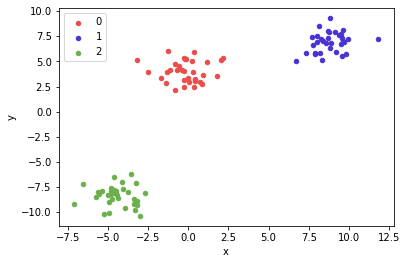

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples = 100, centers = 3, n_features = 2)
df = pd.DataFrame(dict(x = x[:, 0], y = x[:, 1], label = y))

colors = {0 : '#eb4d4b', 1 : '#4834d4', 2 : '#6ab04c'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
plt.show()                  

In [5]:
df.head()

,x,y,label
0,1.129675,-6.706136,2
1,3.363079,-2.330971,1
2,2.859984,-3.357164,1
3,3.129200,-3.087931,1
4,-5.897965,-2.896255,0


In [6]:
points = df.drop('label', axis = 1) # label 삭제 
points.head()

,x,y
0,1.129675,-6.706136
1,3.363079,-2.330971
2,2.859984,-3.357164
3,3.129200,-3.087931
4,-5.897965,-2.896255


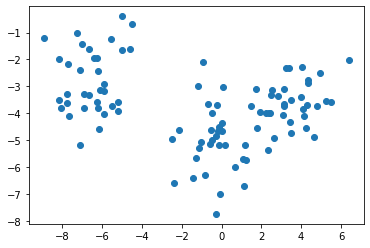

In [7]:
plt.scatter(points.x, points.y)
plt.show()

## 중심점 (Centroid) 계산

K-means 는 centroid-based clustering 알고리즘으로도 불립니다. 

Centroid란, 주어진 cluster 내부에 있는 모든 점들의 중심부분에 위치한 (가상의) 점입니다. 

In [8]:
dataset_centroid_x = points.x.mean()
dataset_centroid_y = points.y.mean()

print(dataset_centroid_x, dataset_centroid_y)

-1.1387586485213692 -3.7754147157642346


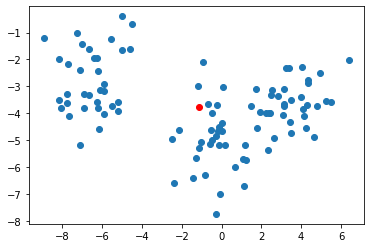

In [9]:
ax.plot(points.x, points.y)
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(dataset_centroid_x, dataset_centroid_y, "or")
plt.show()

## 랜덤한 포인트를 가상 cluster의 centroid로 지정


In [10]:
centroids = points.sample(3) # k-means with 3 cluster
centroids

,x,y
79,4.075724,-3.846211
58,1.228551,-5.731883
8,-2.132091,-4.618585


## 그래프에 표기 

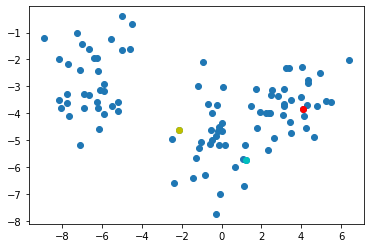

In [11]:
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "or")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "oc")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "oy")
plt.show()

In [30]:
import math
import numpy as np
from scipy.spatial import distance

def find_nearest_centroid(df, centroids, iteration):
 
  # 포인트와 centroid 간의 거리 계산
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # 제일 근접한 centroid 선택
  nearest_centroids = np.argmin(distances, axis = 1)
    
  # cluster 할당
  se = pd.Series(nearest_centroids)
  df['cluster_' + iteration] = se.values
  
  return df

In [13]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

,x,y,cluster_1
0,1.129675,-6.706136,1
1,3.363079,-2.330971,0
2,2.859984,-3.357164,0
3,3.129200,-3.087931,0
4,-5.897965,-2.896255,2


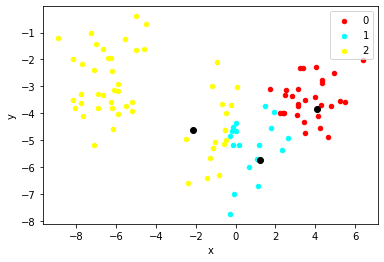

In [14]:
def plot_clusters(df, column_header, centroids):
  colors = {0 : 'red', 1 : 'cyan', 2 : 'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok") # 기존 중심점
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [15]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')
centroids

,x,y
cluster_1,,
0,3.708521,-3.481743
1,0.764957,-5.260656
2,-4.699327,-3.394838


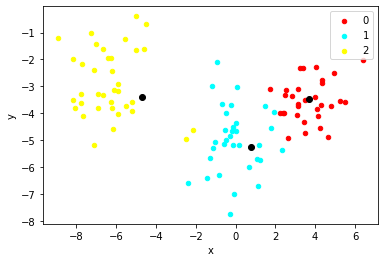

In [16]:
# 변경된 cluster에 대해 centroid 계산
centroids = get_centroids(first_pass, 'cluster_1')

second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

plot_clusters(second_pass, 'cluster_2', centroids)

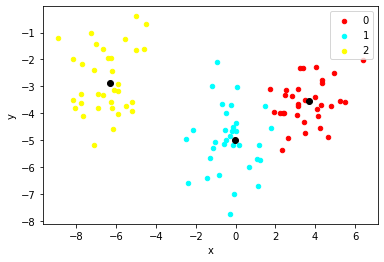

In [17]:
centroids = get_centroids(second_pass, 'cluster_2')

third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

plot_clusters(third_pass, 'cluster_3', centroids)

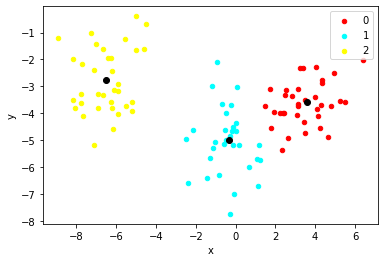

In [18]:
centroids = get_centroids(third_pass, 'cluster_3')

fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

plot_clusters(fourth_pass, 'cluster_4', centroids)

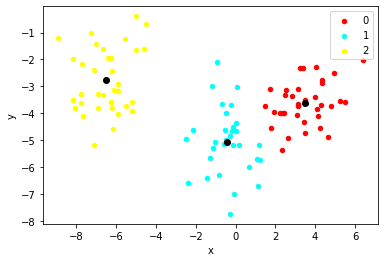

In [19]:
centroids = get_centroids(fourth_pass, 'cluster_4')

fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

plot_clusters(fifth_pass, 'cluster_5', centroids)

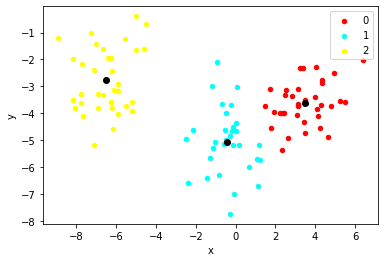

In [20]:
centroids = get_centroids(fifth_pass, 'cluster_5')

sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

plot_clusters(sixth_pass, 'cluster_6', centroids)

In [21]:
# 유의미한 차이가 없을 때 까지 반복, 이번 경우에는 전체 cluster에 변화가 없는 것을 기준으로 하겠습니다.
convergence = np.array_equal(fifth_pass['cluster_5'], sixth_pass['cluster_6'])
convergence

True

## K-means에서 K를 결정하는 방법

- **The Eyeball Method** :사람의 주관적인 판단을 통해서  임의로 지정하는 방법입니다. 

- **Metrics** : 객관적인 지표를 설정하여, 최적화된 k를 선택하는 방법입니다.



## K-means with Scikit-learn 





In [22]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)
labels = kmeans.labels_

print(labels)

[2 0 0 0 1 0 2 0 2 0 2 0 1 1 0 0 2 1 2 2 2 2 2 0 0 2 0 1 2 1 0 1 1 1 2 2 0
 1 1 1 0 0 1 0 1 1 2 0 1 1 0 1 2 2 2 2 1 2 2 1 0 1 0 0 0 1 0 1 0 0 1 1 2 2
 2 1 1 1 0 0 0 2 0 2 2 2 0 1 1 0 1 1 0 1 0 2 0 1 2 2]


In [23]:
new_series = pd.Series(labels)
df['clusters'] = new_series.values
df.head()

,x,y,label,clusters
0,1.129675,-6.706136,2,2
1,3.363079,-2.330971,1,0
2,2.859984,-3.357164,1,0
3,3.129200,-3.087931,1,0
4,-5.897965,-2.896255,0,1


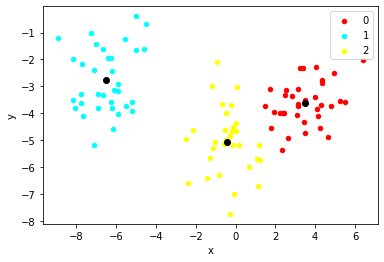

In [24]:
centroids = get_centroids(df, 'clusters')
plot_clusters(df, 'clusters', centroids)

## Elbow methods


In [25]:
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

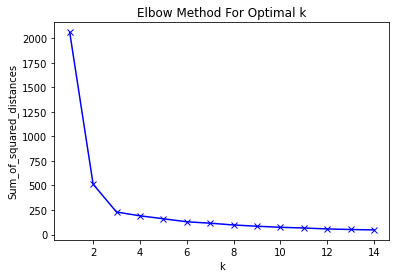

In [26]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Initial Centoid state

k-means는 centroid를 어떻게 선택하느냐에 따라서, clustering의 결과가 안 좋거나 끝없이 반복해야 하는 경우도 있습니다.

## Time complexity

<img src='https://www.researchgate.net/profile/Jie_Yang224/publication/337590055/figure/tbl10/AS:830050941272075@1574910974902/Comparison-of-time-complexity-of-different-clustering-algorithms.png' width = 500>


# 완벽한 알고리즘은 없다.

k-means 말고도 상당히 많은 clustering 알고리즘들이 있으며 

각자 `풀고자 하는 문제`에 대해서 최적화되어있습니다. 

그러나, 최적화된 문제를 제외한 다른부분에는 장점을 보이지 못한다는 단점도 있습니다. 



## 이게 어떤 의미를 갖나요?

1) 문제 해결을 위해서 여러 방법이 있지만 항상 각각의 장단점이 있습니다. 그렇기 때문에 더 많은 방법들을 시도해보고 알고 있을 수록 더 다양한 문제에 대한 답을 줄 수 있다는 의미를 가지며 이것은 여러분이 앞으로도 계속 **연구**를 해야 하는 이유입니다.

2) 한가지 더, 다양한 방법들을 선택하는 최선의 기준은 데이터의 특성일 것입니다. 즉 데이터에 대한 이해가 없다면, 아무리 좋은 방법이 있다고 해도 사용을 할 수 없기 때문에 이것이 **도메인에 대한 지식이 필요한 이유**입니다.

<img src='https://cdn-images-1.medium.com/max/1600/1*oNt9G9UpVhtyFLDBwEMf8Q.png' width = 500>